In [ ]:
%%writefile file.cpp

#include "ns3/core-module.h"
#include "ns3/network-module.h"
#include "ns3/internet-module.h"
#include "ns3/point-to-point-module.h"
#include "ns3/applications-module.h"

using namespace ns3;

int main() {
    NodeContainer nodes;
    nodes.Create(2);

    PointToPointHelper pointToPoint;
    pointToPoint.SetDeviceAttribute("DataRate", StringValue("5Mbps"));
    pointToPoint.SetChannelAttribute("Delay", StringValue("2ms"));

    NetDeviceContainer devices;
    devices = pointToPoint.Install(nodes);

    InternetStackHelper stack;
    stack.Install(nodes);

    Ipv4AddressHelper address;
    address.SetBase("10.1.1.0", "255.255.255.0");
    Ipv4InterfaceContainer interfaces = address.Assign(devices);

    UdpEchoServerHelper echoServer(9);
    ApplicationContainer serverApp = echoServer.Install(nodes.Get(1));
    serverApp.Start(Seconds(1.0));
    serverApp.Stop(Seconds(10.0));

    UdpEchoClientHelper echoClient(interfaces.GetAddress(1), 9);
    echoClient.SetAttribute("MaxPackets", UintegerValue(1));
    echoClient.SetAttribute("Interval", TimeValue(Seconds(1.0)));
    echoClient.SetAttribute("PacketSize", UintegerValue(1024));

    ApplicationContainer clientApp = echoClient.Install(nodes.Get(0));
    clientApp.Start(Seconds(2.0));
    clientApp.Stop(Seconds(10.0));

    Simulator::Run();
    Simulator::Destroy();
    return 0;
}


Writing file.cpp


In [ ]:
!g++ file.cpp -o program


file.cpp:2:10: fatal error: ns3/core-module.h: No such file or directory
    2 | #include "ns3/core-module.h"
      |          ^~~~~~~~~~~~~~~~~~~
compilation terminated.


In [ ]:
!sudo apt-get update


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,454 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,185 kB]
Get:13 http://security.ubuntu.com/ubuntu j

In [ ]:
!sudo apt-get install -y g++ python3 python3-dev cmake git libsqlite3-dev libxml2-dev libgtk-3-dev


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
g++ is already the newest version (4:11.2.0-1ubuntu1).
g++ set to manually installed.
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
git is already the newest version (1:2.34.1-1ubuntu1.11).
libsqlite3-dev is already the newest version (3.37.2-2ubuntu0.3).
libsqlite3-dev set to manually installed.
libxml2-dev is already the newest version (2.9.13+dfsg-1ubuntu0.4).
python3 is already the newest version (3.10.6-1~22.04.1).
python3 set to manually installed.
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
The following additional packages will be installed:
  gir1.2-atk-1.0 gir1.2-atspi-2.0 gir1.2-freedesktop gir1.2-gdkpixbuf-2.0
  gir1.2-gtk-3.0 gir1.2-harfbuzz-0.0 gir1.2-pango-1.0 libatk-bridge2.0-dev
  libatk1.0-dev libatspi2.0-dev libblkid-dev libblkid1
  libcairo-script-interpreter2 libcairo2-dev libdatrie-dev libdbus-1-

In [ ]:
!git clone https://gitlab.com/nsnam/ns-3-dev.git ns-3


Cloning into 'ns-3'...
remote: Enumerating objects: 217462, done.
remote: Counting objects: 100% (9217/9217), done.
remote: Compressing objects: 100% (4139/4139), done.
remote: Total 217462 (delta 5108), reused 8159 (delta 5065), pack-reused 208245 (from 1)
Receiving objects: 100% (217462/217462), 173.75 MiB | 22.81 MiB/s, done.
Resolving deltas: 100% (180077/180077), done.


In [ ]:
!cd ns-3 && ./waf configure && ./waf build


/bin/bash: line 1: ./waf: No such file or directory


In [ ]:
!cd ns-3 && chmod +x waf


chmod: cannot access 'waf': No such file or directory


In [ ]:
!pip install numpy pandas scikit-learn tensorflow flask matplotlib networkx

Epoch 1/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9765 - loss: 0.2333 - val_accuracy: 0.9723 - val_loss: 0.1270
Epoch 2/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9772 - loss: 0.1110 - val_accuracy: 0.9723 - val_loss: 0.1306
Epoch 3/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9762 - loss: 0.1165 - val_accuracy: 0.9723 - val_loss: 0.1267
Epoch 4/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9741 - loss: 0.1236 - val_accuracy: 0.9723 - val_loss: 0.1282
Epoch 5/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9726 - loss: 0.1261 - val_accuracy: 0.9723 - val_loss: 0.1272
Epoch 6/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9768 - loss: 0.1110 - val_accuracy: 0.9723 - val_loss: 0.1269
Epoch 7/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9785 - loss: 0.1063 - val_accuracy: 0.9723 - val_loss: 0.1269
Epoch 8/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9771 - loss: 0.1111 - val_accu

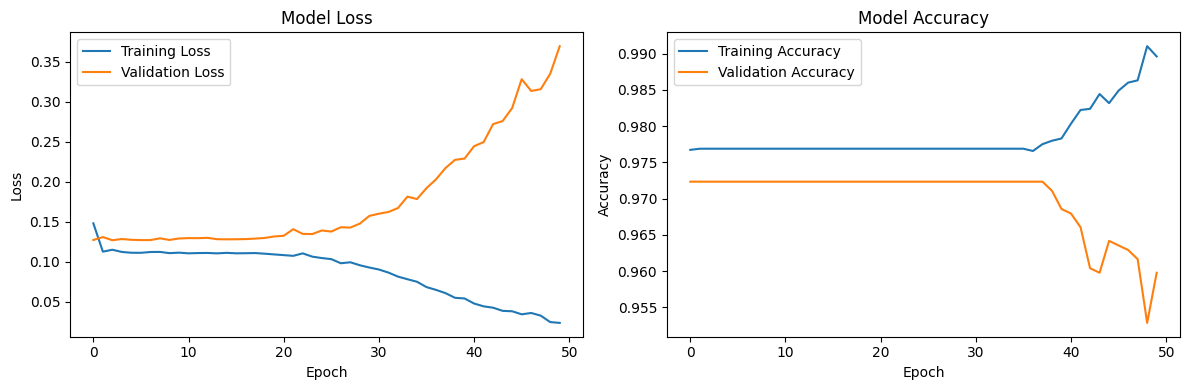

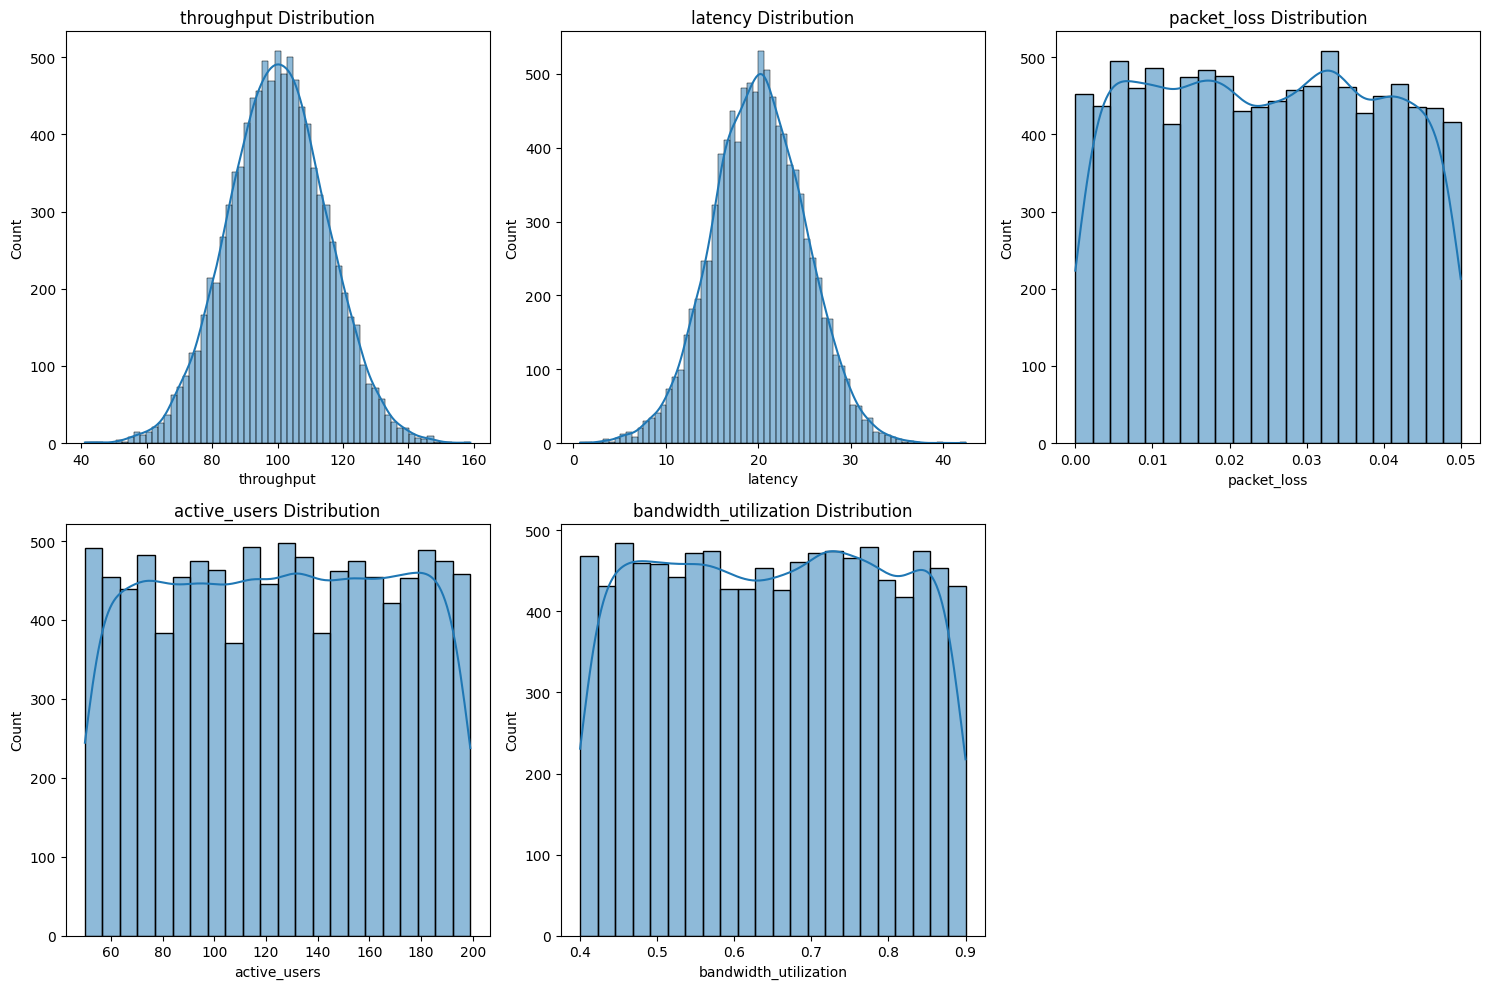

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step



Congestion Probability for Test Data: 0.00%


In [ ]:
# First cell - Install required package
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
import warnings
warnings.filterwarnings('ignore')

# NetworkCongestionPredictor class
class NetworkCongestionPredictor:
    def __init__(self, lookback_window=60):
        self.lookback_window = lookback_window
        self.scaler = StandardScaler()
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential([
            LSTM(64, return_sequences=True, input_shape=(self.lookback_window, 5)),
            Dropout(0.2),
            LSTM(32),
            Dropout(0.2),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])
        return model

    def prepare_data(self, data):
        features = ['throughput', 'latency', 'packet_loss', 'active_users', 'bandwidth_utilization']
        X = data[features].values
        X_scaled = self.scaler.fit_transform(X)

        X_sequences = []
        y = []

        for i in range(len(X_scaled) - self.lookback_window):
            X_sequences.append(X_scaled[i:i + self.lookback_window])
            congestion = int(data.iloc[i + self.lookback_window]['throughput'] < 0.7 * data['throughput'].mean())
            y.append(congestion)

        return np.array(X_sequences), np.array(y)

    def train(self, X_train, y_train, epochs=50, batch_size=32):
        return self.model.fit(X_train, y_train,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_split=0.2,
                            verbose=1)

    def predict_congestion(self, current_metrics):
        # First scale the input metrics
        scaled_metrics = self.scaler.transform(current_metrics)
        # Reshape to match the expected input shape: (1, lookback_window, features)
        scaled_metrics = scaled_metrics.reshape(1, self.lookback_window, 5)
        prediction = self.model.predict(scaled_metrics)
        return prediction[0][0]

# Data simulation function
def simulate_network_metrics(num_samples=1000):
    np.random.seed(42)
    data = {
        'throughput': np.random.normal(100, 15, num_samples),
        'latency': np.random.normal(20, 5, num_samples),
        'packet_loss': np.random.uniform(0, 0.05, num_samples),
        'active_users': np.random.randint(50, 200, num_samples),
        'bandwidth_utilization': np.random.uniform(0.4, 0.9, num_samples)
    }
    return pd.DataFrame(data)

# Generate training data
num_samples = 10000
data = simulate_network_metrics(num_samples)

# Initialize predictor and prepare data
predictor = NetworkCongestionPredictor(lookback_window=60)
X, y = predictor.prepare_data(data)

# Split data into train and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train the model
history = predictor.train(X_train, y_train, epochs=50)

# Plotting functions
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_metrics_distribution(data):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(data.columns, 1):
        plt.subplot(2, 3, i)
        sns.histplot(data[column], kde=True)
        plt.title(f'{column} Distribution')
    plt.tight_layout()
    plt.show()

# Plot training history
plot_training_history(history)

# Plot metrics distribution
plot_metrics_distribution(data)

# Test prediction
test_metrics = np.array([
    [85.5, 25.3, 0.02, 150, 0.75]
])
test_metrics = np.tile(test_metrics, (60, 1))  # Replicate for lookback window
prediction = predictor.predict_congestion(test_metrics)
print(f"\nCongestion Probability for Test Data: {prediction:.2%}")

# Save the model
predictor.model.save('network_congestion_model.keras')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import pickle

class NetworkCongestionPredictor:
    def __init__(self, lookback_window=60):
        self.lookback_window = lookback_window
        self.scaler = StandardScaler()
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential([
            LSTM(64, return_sequences=True, input_shape=(self.lookback_window, 5)),
            Dropout(0.2),
            LSTM(32),
            Dropout(0.2),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])
        return model

    def prepare_data(self, data):
        features = ['throughput', 'latency', 'packet_loss', 'active_users', 'bandwidth_utilization']
        X = data[features].values
        X_scaled = self.scaler.fit_transform(X)

        X_sequences = []
        y = []

        for i in range(len(X_scaled) - self.lookback_window):
            X_sequences.append(X_scaled[i:i + self.lookback_window])
            congestion = int(data.iloc[i + self.lookback_window]['throughput'] < 0.7 * data['throughput'].mean())
            y.append(congestion)

        return np.array(X_sequences), np.array(y)

    def train(self, X_train, y_train, epochs=50, batch_size=32):
        return self.model.fit(X_train, y_train,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_split=0.2,
                            verbose=1)

def simulate_network_metrics(num_samples=1000):
    np.random.seed(42)
    data = {
        'throughput': np.random.normal(100, 15, num_samples),
        'latency': np.random.normal(20, 5, num_samples),
        'packet_loss': np.random.uniform(0, 0.05, num_samples),
        'active_users': np.random.randint(50, 200, num_samples),
        'bandwidth_utilization': np.random.uniform(0.4, 0.9, num_samples)
    }
    return pd.DataFrame(data)

# Main training sequence
if __name__ == "__main__":
    # Generate training data
    num_samples = 10000
    data = simulate_network_metrics(num_samples)

    # Initialize predictor and prepare data
    predictor = NetworkCongestionPredictor(lookback_window=60)
    X, y = predictor.prepare_data(data)

    # Split data into train and test sets
    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Train the model
    history = predictor.train(X_train, y_train, epochs=50)

    # Save the model and scaler
    predictor.model.save('network_congestion_model.keras')
    with open('scaler.pkl', 'wb') as f:
        pickle.dump(predictor.scaler, f)

    print("Model and scaler have been saved successfully!")

Epoch 1/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9490 - loss: 0.2692 - val_accuracy: 0.9723 - val_loss: 0.1273
Epoch 2/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9727 - loss: 0.1260 - val_accuracy: 0.9723 - val_loss: 0.1271
Epoch 3/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9767 - loss: 0.1130 - val_accuracy: 0.9723 - val_loss: 0.1274
Epoch 4/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9776 - loss: 0.1100 - val_accuracy: 0.9723 - val_loss: 0.1279
Epoch 5/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9789 - loss: 0.1063 - val_accuracy: 0.9723 - val_loss: 0.1276
Epoch 6/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9755 - loss: 0.1166 - val_accuracy: 0.9723 - val_loss: 0.1269
Epoch 7/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9751 - loss: 0.1187 - val_accuracy: 0.9723 - val_loss: 0.1268
Epoch 8/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9765 - loss: 0.1135 - val_accu

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle

def load_prediction_components():
    # Load the trained model
    model = load_model('network_congestion_model.keras')

    # Load the scaler
    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)

    return model, scaler

def predict_congestion(model, scaler, current_metrics, lookback_window=60):
    # Replicate the single measurement for the lookback window
    if current_metrics.shape[0] == 1:
        current_metrics = np.tile(current_metrics, (lookback_window, 1))

    # Scale the input metrics
    scaled_metrics = scaler.transform(current_metrics)

    # Reshape for the model
    scaled_metrics = scaled_metrics.reshape(1, lookback_window, 5)

    # Make prediction
    prediction = model.predict(scaled_metrics, verbose=0)
    return prediction[0][0]

if __name__ == "__main__":
    # Load the model and scaler
    model, scaler = load_prediction_components()

    # Example test data
    test_metrics = np.array([
        [85.5, 25.3, 0.02, 150, 0.75]  # throughput, latency, packet_loss, active_users, bandwidth_utilization
    ])

    # Make prediction
    congestion_probability = predict_congestion(model, scaler, test_metrics)
    print(f"\nCongestion Probability: {congestion_probability:.2%}")


Congestion Probability: 0.04%


In [ ]:
import numpy as np
import pandas as pd

def simulate_network_metrics(num_samples=1000, random_seed=42):
    """
    Simulate network metrics and create a dataset

    Parameters:
    num_samples (int): Number of data points to generate
    random_seed (int): Seed for reproducibility

    Returns:
    pandas.DataFrame: DataFrame containing simulated network metrics
    """
    np.random.seed(random_seed)

    # Generate time indices
    time_index = pd.date_range(start='2024-01-01',
                             periods=num_samples,
                             freq='1min')

    # Generate network metrics with daily patterns
    hour_of_day = time_index.hour

    # Base metrics - note that active_users is now float64
    throughput_base = np.random.normal(100, 15, num_samples)
    latency_base = np.random.normal(20, 5, num_samples)
    packet_loss_base = np.random.uniform(0, 0.05, num_samples)
    active_users_base = np.random.randint(50, 200, num_samples).astype(np.float64)
    bandwidth_util_base = np.random.uniform(0.4, 0.9, num_samples)

    # Add time-based patterns
    # More traffic during business hours (9-17)
    business_hours = ((hour_of_day >= 9) & (hour_of_day <= 17))
    throughput_base[business_hours] *= 1.3
    active_users_base[business_hours] *= 1.5

    # Convert active_users back to integer after calculations
    active_users_base = np.round(active_users_base).astype(int)

    data = {
        'timestamp': time_index,
        'throughput': throughput_base,
        'latency': latency_base,
        'packet_loss': packet_loss_base,
        'active_users': active_users_base,
        'bandwidth_utilization': bandwidth_util_base,
        'hour_of_day': hour_of_day
    }

    return pd.DataFrame(data)

def add_derived_metrics(df):
    """
    Add derived metrics and labels to the dataset
    """
    # Calculate moving averages
    df['throughput_ma'] = df['throughput'].rolling(window=10).mean()
    df['latency_ma'] = df['latency'].rolling(window=10).mean()

    # Calculate congestion label (1 if throughput < 70% of mean throughput)
    df['congestion'] = (df['throughput'] < 0.7 * df['throughput'].mean()).astype(int)

    # Drop rows with NaN values from moving average calculations
    return df.dropna()

if __name__ == "__main__":
    # Generate larger dataset
    num_samples = 10000
    print(f"Generating {num_samples} samples of network metrics...")

    # Generate base data
    network_data = simulate_network_metrics(num_samples)

    # Add derived metrics
    network_data = add_derived_metrics(network_data)

    # Save to CSV
    output_file = 'network_metrics.csv'
    network_data.to_csv(output_file, index=False)

    print(f"\nDataset creation complete!")
    print(f"Total samples: {len(network_data)}")
    print(f"Features: {', '.join(network_data.columns)}")
    print(f"Data saved to: {output_file}")

    # Display data summary
    print("\nData Summary:")
    print(network_data.describe())

Generating 10000 samples of network metrics...

Dataset creation complete!
Total samples: 9991
Features: timestamp, throughput, latency, packet_loss, active_users, bandwidth_utilization, hour_of_day, throughput_ma, latency_ma, congestion
Data saved to: network_metrics.csv

Data Summary:
                 timestamp   throughput      latency   packet_loss  \
count                 9991  9991.000000  9991.000000  9.991000e+03   
mean   2024-01-04 11:24:00   111.304213    20.068569  2.476308e-02   
min    2024-01-01 00:09:00    41.163996     0.718123  2.768338e-07   
25%    2024-01-02 17:46:30    95.364803    16.692056  1.226446e-02   
50%    2024-01-04 11:24:00   108.585855    20.080183  2.483271e-02   
75%    2024-01-06 05:01:30   125.548095    23.469522  3.695089e-02   
max    2024-01-07 22:39:00   195.858967    42.395421  4.998947e-02   
std                    NaN    22.272547     5.005973  1.434245e-02   

       active_users  bandwidth_utilization  hour_of_day  throughput_ma  \
count  